In [0]:
# Importing file from Local Drive
from google.colab import files
uploaded = files.upload()

## **Importing the Libbraries**

In [0]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6

## **Importing the Dataset**

In [0]:
df = pd.read_csv(io.StringIO(uploaded['loan.csv'].decode('ISO-8859-1')))
df.describe()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## **Check and remove columns with no values i.e entire column is empty**

In [0]:
#Remove null columns where all values are null
nullcolumns = (df.isnull().sum()/len(df))
columns_to_be_dropped = list(nullcolumns[nullcolumns.values>=1].index)  
print(columns_to_be_dropped)
df.drop(labels = columns_to_be_dropped,axis =1,inplace=True)     
df.shape

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

(39717, 57)

## **Checkout the missing data in coulmns**

In [0]:
# checkout the missing data in columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
next_pymnt_d,38577,0.971297
mths_since_last_record,36931,0.929854
mths_since_last_delinq,25682,0.646625
desc,12940,0.325805
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
chargeoff_within_12_mths,56,0.001410
collections_12_mths_ex_med,56,0.001410


## **Remove unnecessary coulumns and those having missing value more than 90%**

**columns_to_be_dropped = ['member_id','id','emp_title','pymnt_plan','url','desc','zip_code','initial_list_status','policy_code', 'application_type','acc_now_delinq','tax_liens','next_pymnt_d','mths_since_last_record','mths_since_last_delinq'] **

In [0]:
#Remove columns(id, emp_title, pymnt_plan, url, desc, zip_code, initial_list_status, policy_code, application_type, acc_now_delinq, delinq_amnt, tax_liens) those are irrelevant and having missing information(>90%)
columns_to_be_dropped = ['member_id','id','emp_title','pymnt_plan','url','desc','zip_code','initial_list_status','policy_code', 'application_type','acc_now_delinq','tax_liens','next_pymnt_d','mths_since_last_record','mths_since_last_delinq']

df.drop(labels = columns_to_be_dropped,axis =1,inplace=True)     
df.shape


(39717, 42)

**Re-check... for missing values**


In [0]:
# checkout the missing data in columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
chargeoff_within_12_mths,56,0.001410
collections_12_mths_ex_med,56,0.001410
revol_util,50,0.001259
title,11,0.000277
last_credit_pull_d,2,0.000050
home_ownership,0,0.000000
purpose,0,0.000000


**Formatting 'int_rate' column(remove '%' and covert to float)**

In [0]:
#formatting 'int_rate' column(removing '%' and coverting them to float)
df['int_rate'] = df['int_rate'].astype(str)
df['int_rate']=df['int_rate'].apply(lambda x: x.replace('%',"").strip()).astype(float)
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

**Formatting 'emp_length' column(replace 'n/a' to 'Self-Employed')**

In [0]:
#formatting 'emp_length' (replace 'n/a' to 'Self-Employed')
df.emp_length.fillna('0',inplace=True)
df.emp_length.replace('0','Self-employed',inplace=True)
print(df.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' 'Self-employed']


#Dreived Columns

**'Issue_year' and 'issue_month' from 'issue_d'**

'**loan_amt_to_annual_income_ratio' from 'loan_amnt' and 'annual_inc'**

In [0]:

df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

df['issue_year'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_month'] = pd.DatetimeIndex(df['issue_d']).month
df[['issue_d','issue_month','issue_year']].head()
df['loan_to_annual'] = round((df['loan_amnt']/df['annual_inc'])*100)
df['loan_amt_to_annual_income_ratio'] = round((df['loan_amnt']/df['annual_inc'])*100)


In [0]:
df['loan_amt_to_annual_income_ratio'].describe()

#Removing outliers

**from  'annual_inc'  column**

{'boxes': [<matplotlib.lines.Line2D at 0x7f543bfcccf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f543bf58668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f543c8822e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f543bf58f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f543bfccf98>,
  <matplotlib.lines.Line2D at 0x7f543bf58320>]}

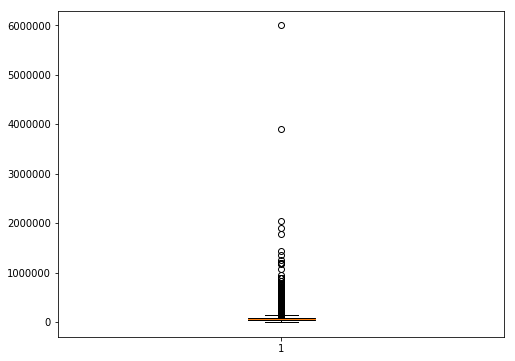

In [0]:
plt.boxplot(df.annual_inc)

In [0]:
q = df["annual_inc"].quantile(0.90)
df = df[df["annual_inc"] < q]
df["annual_inc"].describe()

count     35740.000000
mean      57387.003107
std       23644.470090
min        4000.000000
25%       39996.000000
50%       54996.000000
75%       74000.000000
max      115956.000000
Name: annual_inc, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f543c82ac18>],
 'caps': [<matplotlib.lines.Line2D at 0x7f543c82a748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f543c565048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f543c5655c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f543c82a9e8>,
  <matplotlib.lines.Line2D at 0x7f543c82aac8>]}

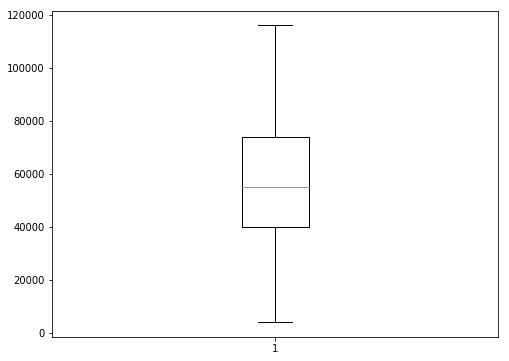

In [0]:
plt.boxplot(df.annual_inc)

# **Univariate Analysis**

**function to plot univariate analysis for continuous variables**

In [0]:
def univariate_continuous(column_name, dataset_name):
  plt.figure(figsize=(12,6))
  plt.subplot(121)

  graph = sns.distplot(dataset_name[column_name])
        
  graph.set_xlabel('', fontsize=12)
  graph.set_ylabel('Frequency Dist',fontsize=12)
  graph.set_title('Frequency Dist. of {0}'.format(column_name), fontsize=20)

  plt.subplot(122)
  graph1 = sns.violinplot(y=column_name,data =dataset_name,inner='quartile', palette='hls')
  graph1.set_xlabel('', fontsize=12)
  graph1.set_ylabel('Frequency Dist',fontsize=12)
  graph1.set_title('Frequency Dist. of {0}'.format(column_name), fontsize=20)

  plt.show()


# **Univariate analysis for continuous variable**

**Distribution of 'funded amount'**

**Result: Most of the funded amount lies between 5000 to 15,000**

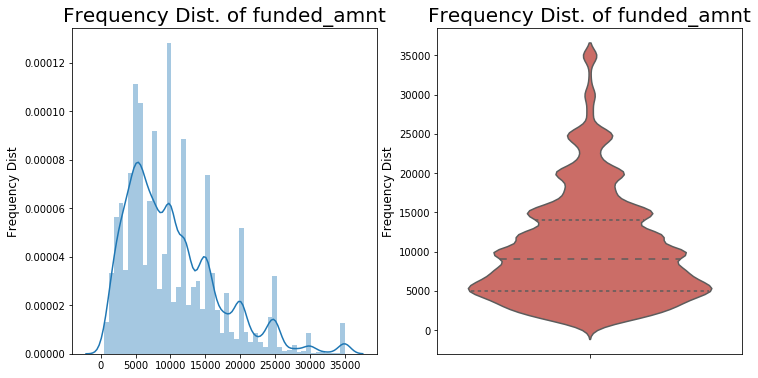

In [0]:
univariate_continuous('funded_amnt', df)

**Plotting graph for showing distribution of Interst Rate**

Result: Most of values lies between 9.25% to 14.59%


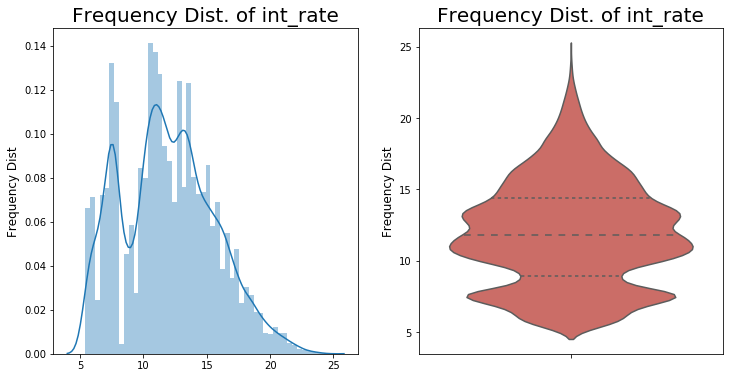

In [0]:
univariate_continuous('int_rate', df)

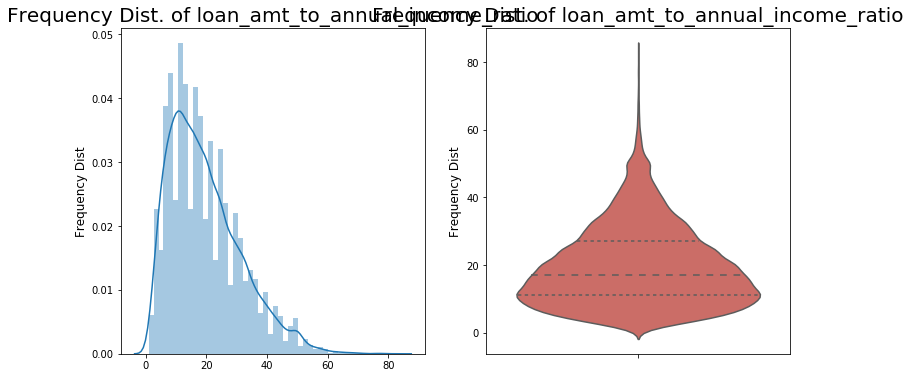

In [0]:
univariate_continuous('loan_amt_to_annual_income_ratio',df)

# ** Univariate analysis for categorical values**

**function to plot univariate analysis for categorical variables**

In [0]:
def univariate_categorical(column_name, dataset_name):
  plt.figure(figsize = (15,14))
  plt.subplot(311)
 # g = sns.countplot(x=column_name, data=dataset_name)
  g = sns.countplot(x=column_name, data=dataset_name)
  g.set_xticklabels(g.get_xticklabels(),rotation=45)
  g.set_xlabel("", fontsize=12)
  g.set_ylabel("Count", fontsize=15)
  g.set_title("Loan Distribution by " + column_name, fontsize=20)
 # for p in g.patches:
 #        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
  plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

  plt.show()
  

 **plotting graph for 'loan_status'**

 **Result: most of them found in 'Fully Paid ' category**

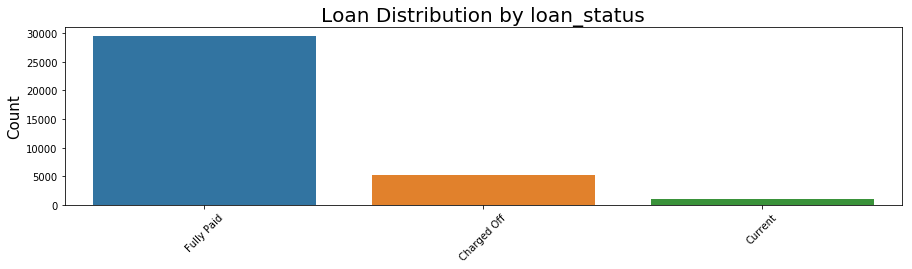

In [0]:
univariate_categorical('loan_status',df)

**Plotting graph for 'term' **

**Result: Most of applicatant took '36 month' plan **

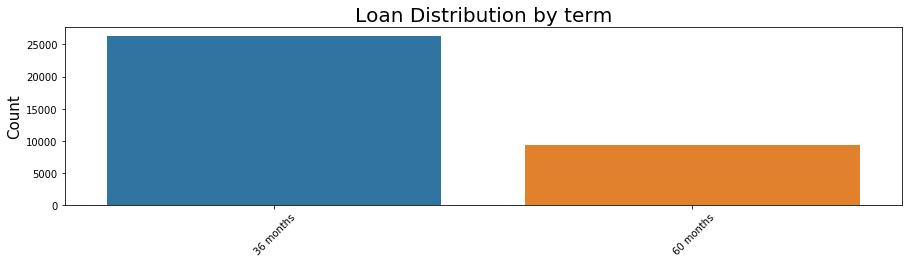

In [0]:
univariate_categorical('term',df)

**Plotting graph for 'verification_status' **

**Result: Most of applicatant have 'Not Verified' status at the time of loan **

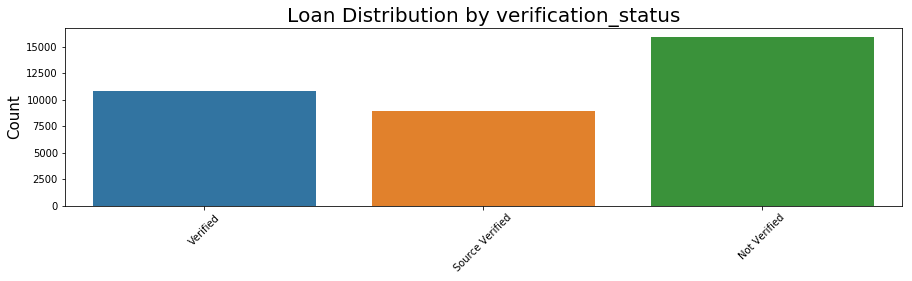

In [0]:
univariate_categorical('verification_status',df)

**Plotting graph for 'home_ownership' **

**Result: Most of applicatant on rented home at the time of loan **

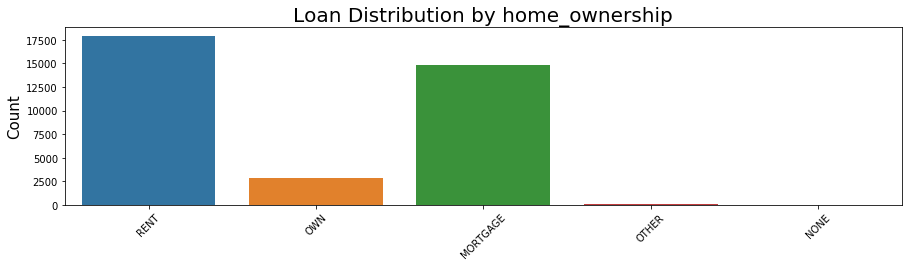

In [0]:
univariate_categorical('home_ownership',df)

**Plotting graph for 'grade' **

**Result: Most of applicatant have 'B'  grade at the time of loan **

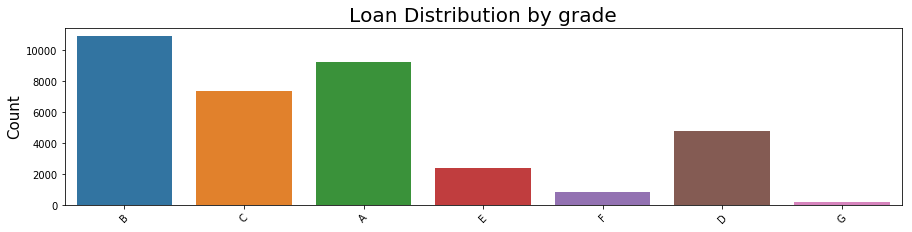

In [0]:
univariate_categorical('grade',df)

**Plotting graph for 'emp_length'**

**Result: Most of the loan applicants having 10+ years of experience.**

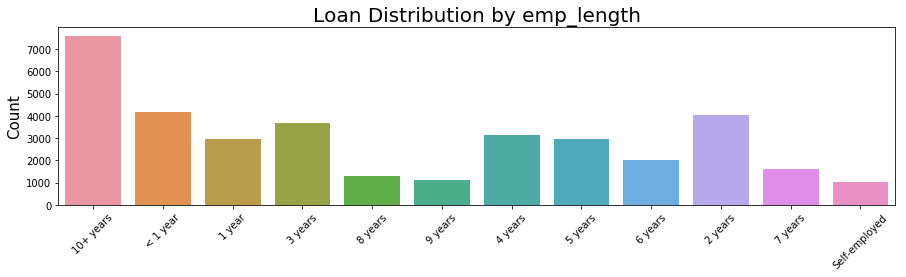

In [0]:
univariate_categorical('emp_length',df)

**Plotting graph for 'addr_state'**

**Result: Most of applicants from "CA" state **

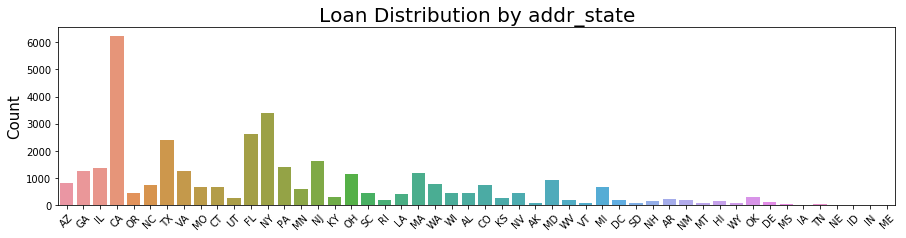

In [0]:
univariate_categorical('addr_state',df)

**Plotting graph for 'purpose' column**

**Result: Most of them took loan for 'Debt consolidation'**

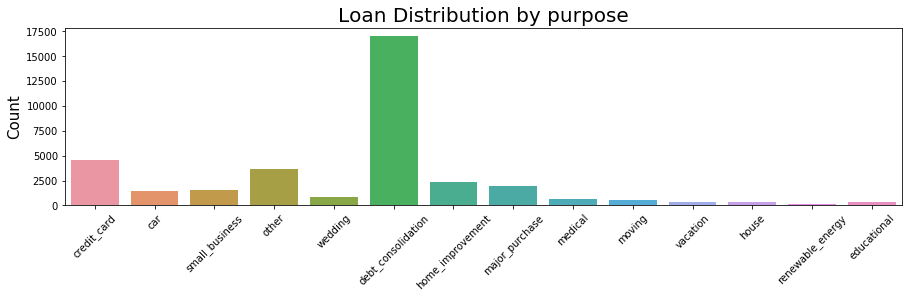

In [0]:
univariate_categorical('purpose',df)

**plotting graph for 'issued_year' **

**Result: loan application was keep incresing increasing year by year**

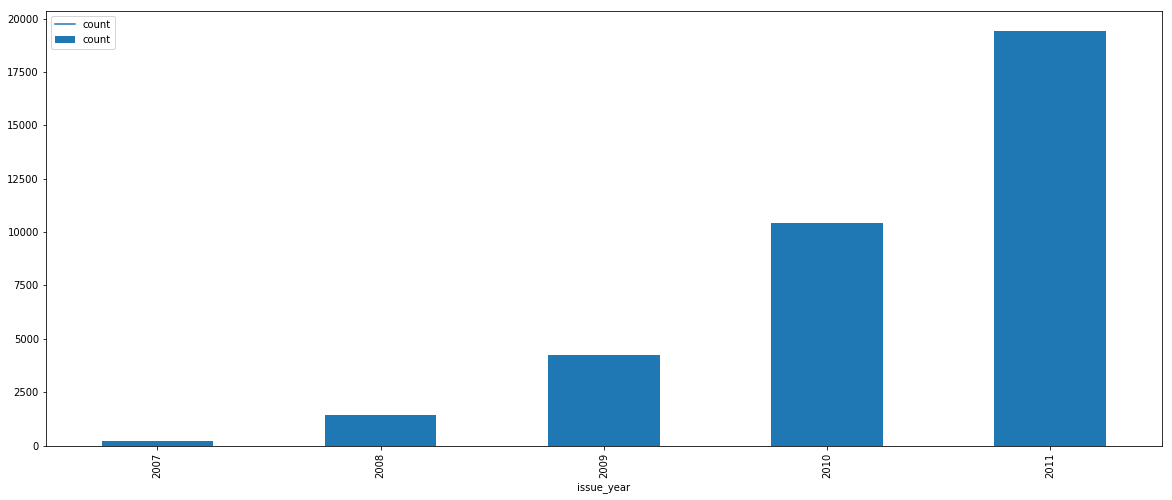

In [0]:
year_wise =df.groupby(by= [df.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

# Univariate analysis with Target column('loan_status')

In [0]:
def univariate_categorical_targetColumn(column_name, dataset_name,targetColumn):
  temp = pd.Series(data = targetColumn)
  fig, ax = plt.subplots()
  width = len(dataset_name[column_name].unique()) + 6 + 4*len(temp.unique())
  fig.set_size_inches(width , 7)
  ax = sns.countplot(data = dataset_name, x= column_name, order=dataset_name[column_name].value_counts().index,hue = targetColumn) 
  if len(temp.unique()) > 0:
    for p in ax.patches:
      ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(dataset_name))), (p.get_x()+0.05, p.get_height()+20))  
  else:
    for p in ax.patches:
      ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 

**plotting graph for 'home_ownership' with 'loan_staus' **

**Result: most of the loan applicants living on rented home and applicants with 'Mortgage' having higher number of charged off   **

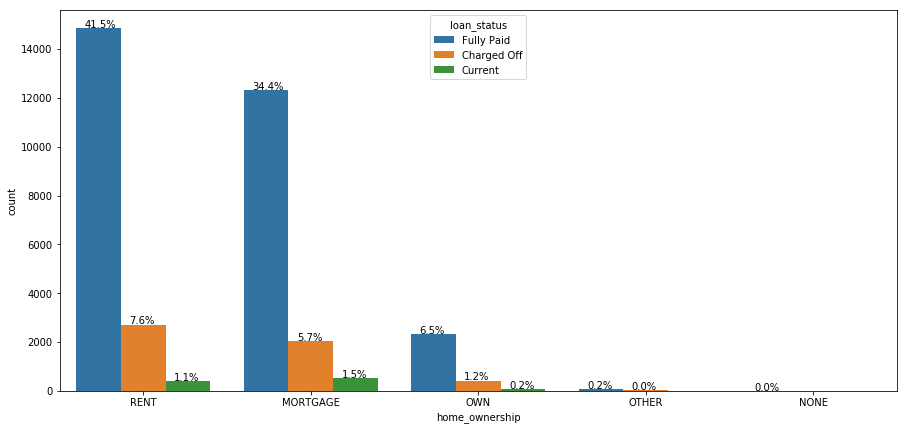

In [0]:
univariate_categorical_targetColumn('home_ownership',df,'loan_status')

**plotting graph for 'verification_status' with 'loan_staus' **

**Result: most of the loan applicants have 'not_verfied' status and applicants with 'Verfied'  status having higher number of charged off   **

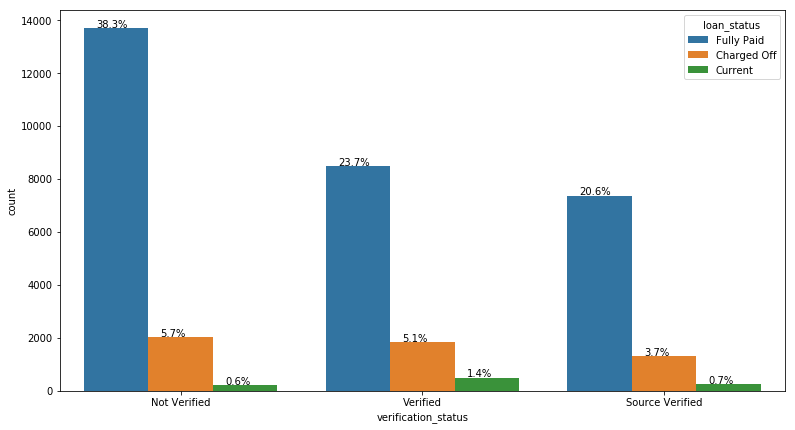

In [0]:
univariate_categorical_targetColumn('verification_status',df,'loan_status')

# **BiVariate Analysis**

**BiVariate Analysis between 'purpose' and 'grade'**

**Result:  most of the Applicants those took loan for 'debt_consolidation' are belong to "B" grade**

In [0]:
loan_grade = ['purpose', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[loan_grade[0]], df[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
purpose,,,,,,,
car,561,462,233,120,50,11,2
credit_card,1292,1497,949,518,236,83,19
debt_consolidation,3598,5195,3651,2579,1367,491,130
educational,78,94,85,30,14,3,1
home_improvement,793,729,433,246,137,44,10
house,91,93,63,44,24,11,4
major_purchase,745,546,359,218,83,25,6
medical,187,181,123,75,36,12,2
moving,149,168,107,63,24,9,3


**BiVariate analysis between 'term' and 'home_ownership'**

**Result: " Applicatnts living on rented home took '36 month '" term plan**

In [0]:
loan_grade = ['term', 'home_ownership']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[loan_grade[0]], df[loan_grade[1]]).style.background_gradient(cmap = cm)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
term,,,,,
36 months,10140,2,89,2126,14002
60 months,4741,0,1,701,3938


**Plotting graph between 'loan_status'and 'Loan Amount Percentage'**

**Result: It shows that "Charged Off" and "Current" status has loan amount percentage is higher with respect to annual income compared to "Fully Paid" status **

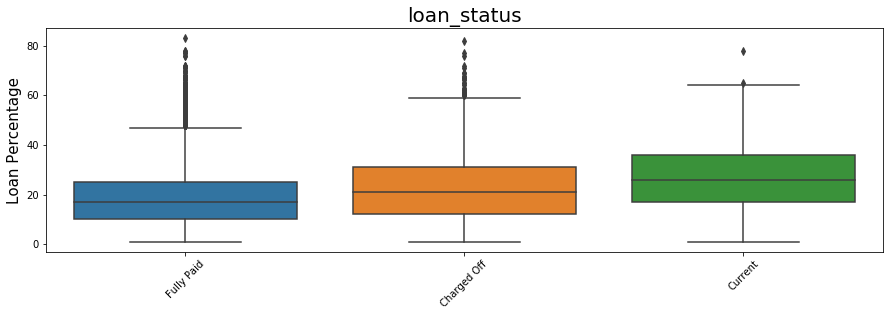

In [0]:
plt.figure(figsize = (15,14))
plt.subplot(311)
g = sns.boxplot(x="loan_status",y="loan_amt_to_annual_income_ratio", data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Loan Percentage", fontsize=15)
g.set_title("loan_status", fontsize=20)
plt.show()

**Plotting graph between 'past_due_incidents' and 'Loan_amount'**

** Result: From the below boxplot we can conclude that there will be more defaulters in current loan takers**

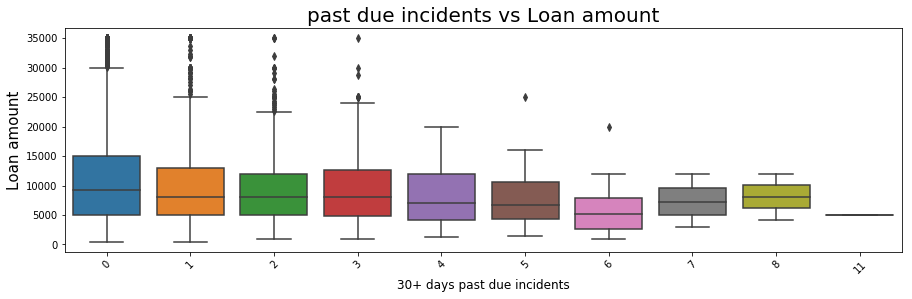

In [0]:
plt.figure(figsize = (15,14))
plt.subplot(311)
g = sns.boxplot(x="delinq_2yrs",y="loan_amnt", data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("30+ days past due incidents", fontsize=12)
g.set_ylabel("Loan amount", fontsize=15)
g.set_title("past due incidents vs Loan amount", fontsize=20)
plt.show()

** Plotting graph between 'home_ownership' and '30+ days past due'**

** Result:  It shows that rented loan borrowers has more chaces to be defaulted**

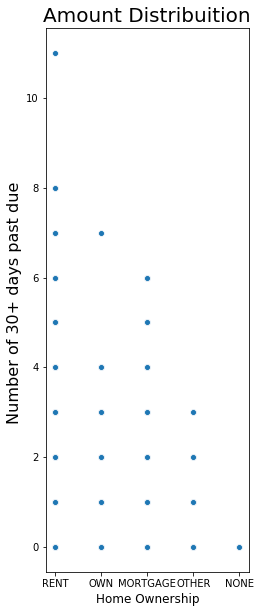

In [0]:
plt.figure(figsize = (8,10))

plt.subplot(122)
g1 = sns.scatterplot(y="delinq_2yrs",x = "home_ownership", data=df)
g1.set_xlabel("Home Ownership", fontsize=12)
g1.set_ylabel("Number of 30+ days past due ", fontsize=16)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

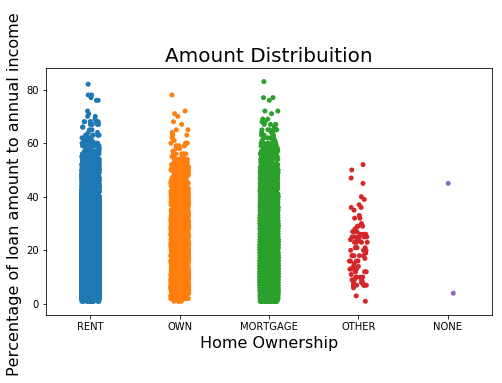

In [0]:
plt.figure(figsize = (8,10))

plt.subplot(211)
g1 = sns.stripplot(y="loan_amt_to_annual_income_ratio",x = "home_ownership", data=df)
g1.set_xlabel("Home Ownership", fontsize=16)
g1.set_ylabel("Percentage of loan amount to annual income ", fontsize=16)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

**Bar Plot of 'loan_amnt', 'funded_amnt, 'funded_amnt_inv' based upon 'issue_year' and 'issued'**

In [0]:
# Function created for Bar Plots for Bivariate analysis
def create_bar_plot(df,columns,against,title,hue=None):
    for col in columns:
        plt.figure(figsize=(18,4))
        sns.barplot(against, col,hue=hue, data=df,palette=sns.color_palette("Set2"))
        plt.title(col+ ' '+title, fontsize=16)
        plt.xlabel(against, fontsize=14)
        plt.ylabel('Average '+col+' issued', fontsize=14)

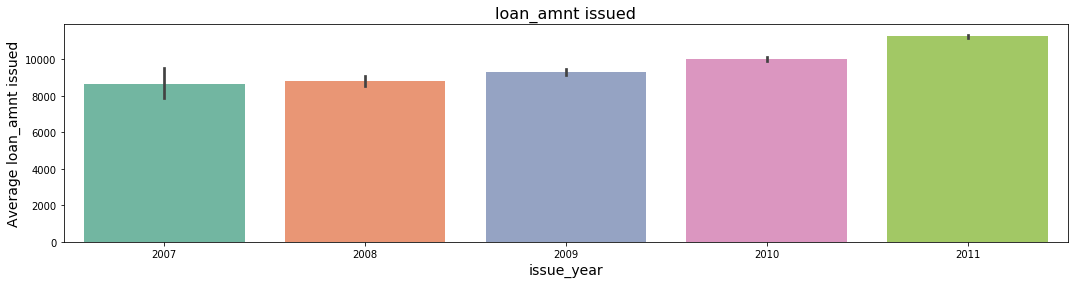

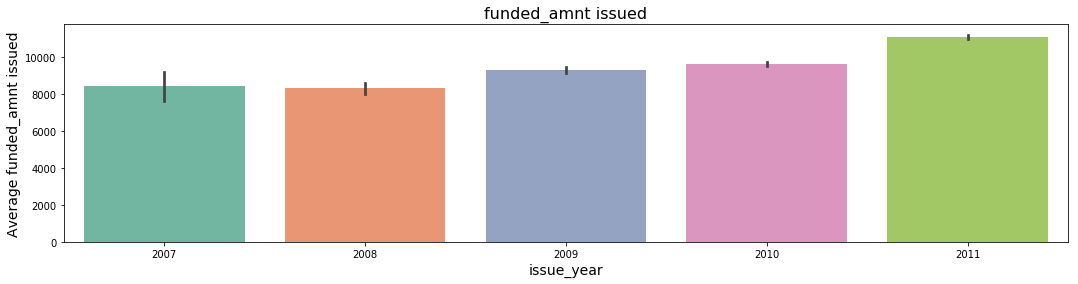

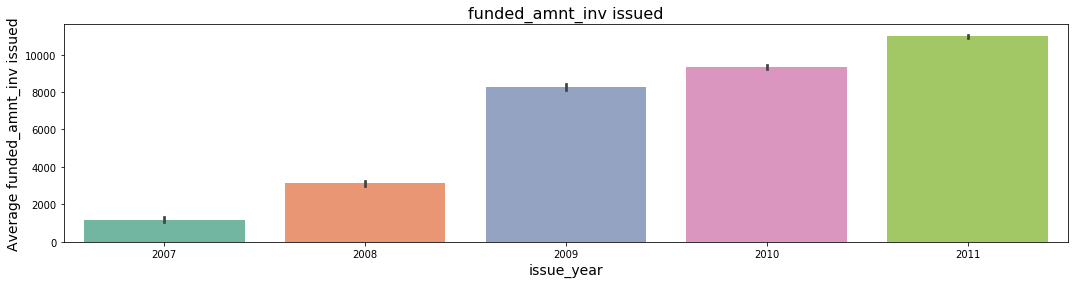

In [0]:
col_list=['loan_amnt','funded_amnt', 'funded_amnt_inv']

create_bar_plot(df,col_list,'issue_year','issued')

# Correlation Matrix

**Analysis: loan_amount is highly correlated with funded_amnt,installment, total_pymnt, loan_to_annual which actually true in real life case also
recoveries is highly correlated with collection_recovery_fee
total_rec_prncp is also correlated with total_pymnt_inv i.e principle is dependent on the investor amount **



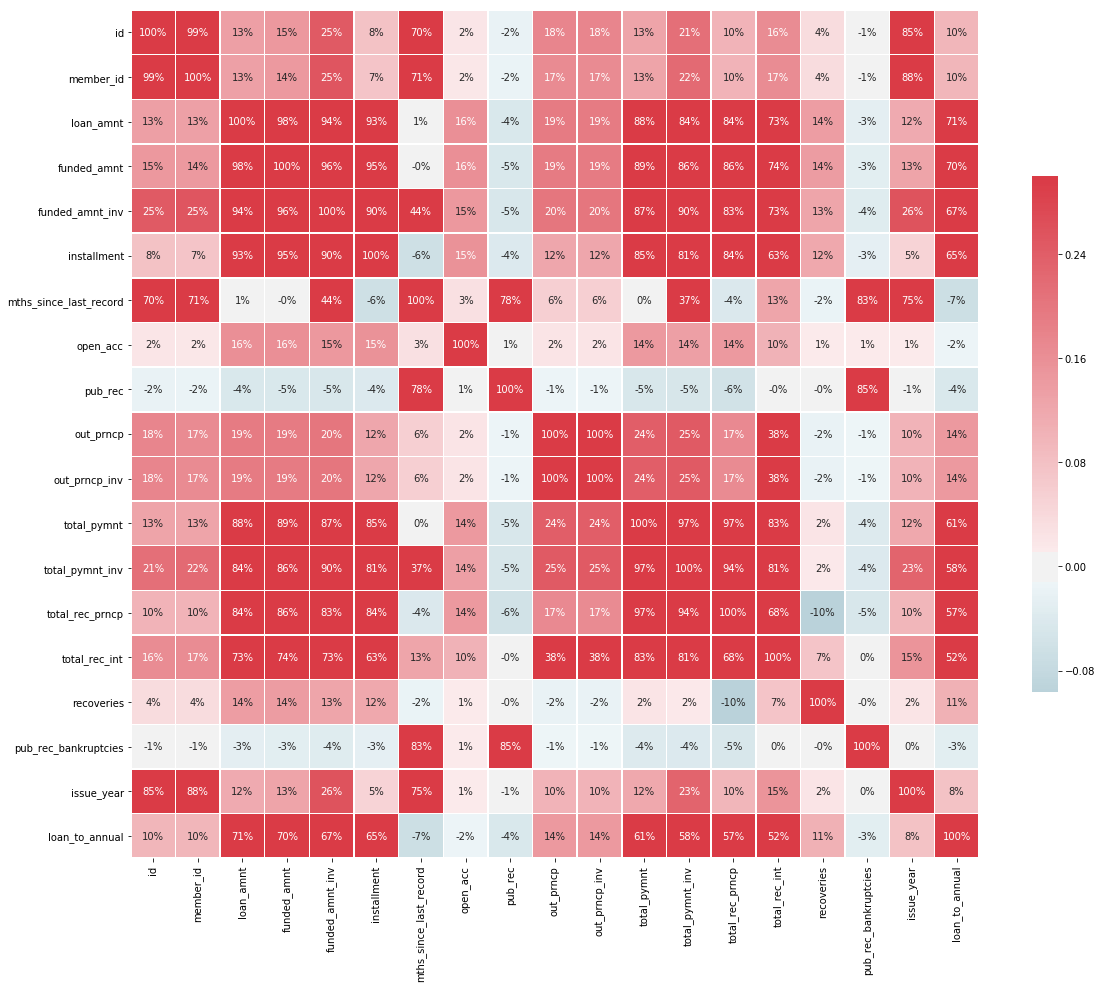

In [0]:
# Create correlation matrix
df_new = df.copy()
nullcolumns = (df_new.corr().isnull().sum()/len(df_new.corr()))
columns_to_be_dropped = list(nullcolumns[nullcolumns.values>=1].index)  
corr = df_new.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr = corr.unstack().transpose().sort_values( ascending=False).dropna()
top_correlated_col = (set(corr.head(30).index.get_level_values(0)).union(set(corr.head(50).index.get_level_values(1))))
to_drop = list(set(df_new.columns)-set(top_correlated_col))
to_drop.append('loan_amt_to_annual_income_ratio')
df_new.drop(labels = to_drop,axis =1,inplace=True)
corr_matrix = df_new.corr()
corr_matrix.dropna()
colsize = df_new.shape[1]
f, ax = plt.subplots(figsize=( colsize ,  colsize))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.0%')